In [1]:
%matplotlib inline
import numpy as np

**REGRESSION par AD**

On récupère le fichier housing.csv

In [2]:
import pandas as pd

home_data = pd.read_csv('housing.csv', usecols = ['longitude', 'latitude', 'median_house_value'])
home_data.head()

,longitude,latitude,median_house_value
0,-122.23,37.88,452600.0
1,-122.22,37.86,358500.0
2,-122.24,37.85,352100.0
3,-122.25,37.85,341300.0
4,-122.25,37.85,342200.0


<Axes: xlabel='longitude', ylabel='latitude'>

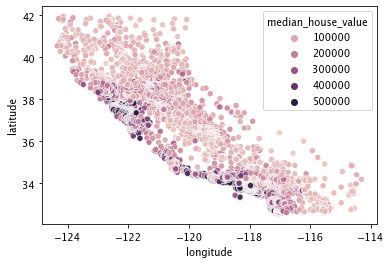

In [3]:
#Affichez les données
#https://seaborn.pydata.org/
import seaborn as sns

sns.scatterplot(data = home_data,
                x = 'longitude', y = 'latitude', hue = 'median_house_value')

Faites Regression par les méthodes d'Arbre de Décision de profondeur 3, 4, 5. Prenez test_size=0.33

Visualisez par "tree.export_text"

Quels sont les scores pour les données de test?


In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import export_text

diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

for depth in [3, 4, 5]:
    print(f"\nProfondeur de l'arbre : {depth}")
    tree = DecisionTreeRegressor(max_depth=depth)
    tree.fit(X_train, y_train)
    print("Arbre de décision :")
    print(export_text(tree, feature_names=diabetes.feature_names))
    
    # Prédiction sur l'ensemble de test
    y_pred = tree.predict(X_test)
    
    # Calcul du score pour les données de test
    score = mean_squared_error(y_test, y_pred)
    print(f"Score pour les données de test : {score}")


Profondeur de l'arbre : 3
Arbre de décision :
|--- bmi <= 0.01
|   |--- s5 <= -0.00
|   |   |--- s2 <= 0.09
|   |   |   |--- value: [97.35]
|   |   |--- s2 >  0.09
|   |   |   |--- value: [241.50]
|   |--- s5 >  -0.00
|   |   |--- s4 <= 0.10
|   |   |   |--- value: [148.22]
|   |   |--- s4 >  0.10
|   |   |   |--- value: [256.33]
|--- bmi >  0.01
|   |--- bmi <= 0.07
|   |   |--- bp <= 0.02
|   |   |   |--- value: [160.72]
|   |   |--- bp >  0.02
|   |   |   |--- value: [223.00]
|   |--- bmi >  0.07
|   |   |--- s2 <= 0.02
|   |   |   |--- value: [296.87]
|   |   |--- s2 >  0.02
|   |   |   |--- value: [224.14]

Score pour les données de test : 3908.7899735695873

Profondeur de l'arbre : 4
Arbre de décision :
|--- bmi <= 0.01
|   |--- s5 <= -0.00
|   |   |--- s2 <= 0.09
|   |   |   |--- s5 <= -0.04
|   |   |   |   |--- value: [79.15]
|   |   |   |--- s5 >  -0.04
|   |   |   |   |--- value: [107.58]
|   |   |--- s2 >  0.09
|   |   |   |--- s2 <= 0.11
|   |   |   |   |--- value: [230.00

Faites la regression par une autre méthode à l'exception de la méthode du polus proche voisin.

Comparez vos résultats

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_linear = linear_reg.predict(X_test)
score_linear = mean_squared_error(y_test, y_pred_linear)
print("Score pour les données de test avec régression linéaire :", score_linear)

Score pour les données de test avec régression linéaire : 2817.808297221586


Faites Apprentissage non supervisé par la méthode Kmeans n_clusters = 3,4,5,6

Visualisez les clusters pour chaque méthode

Par la méthode d'Elbow, trouvez le "meilleur" nombre de clusters

Quels sont des prix approximatifs pour ce nombre de clusters


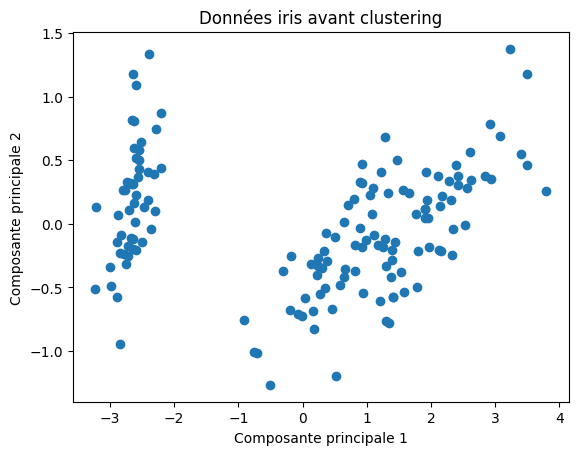

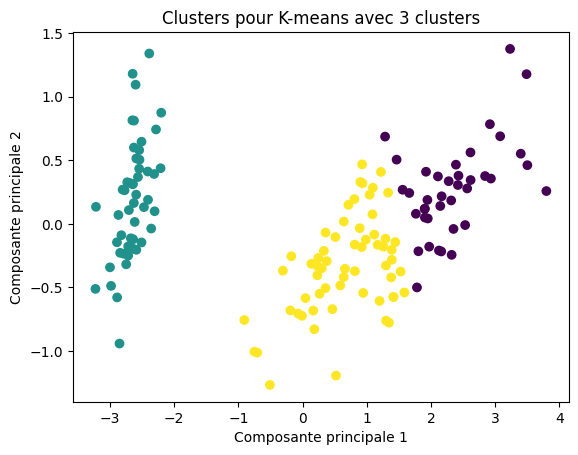

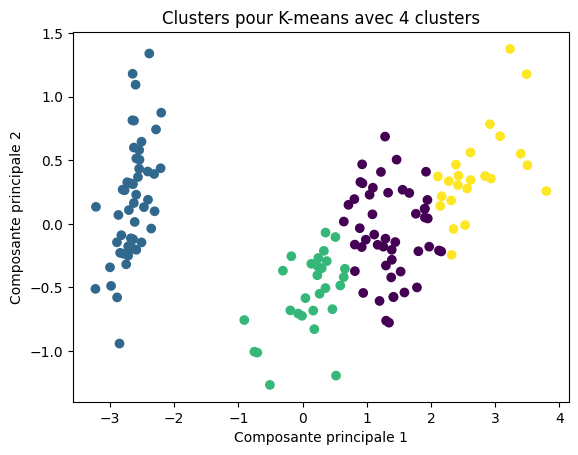

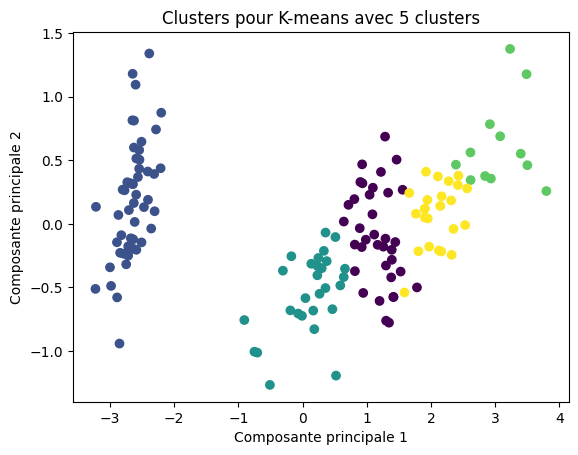

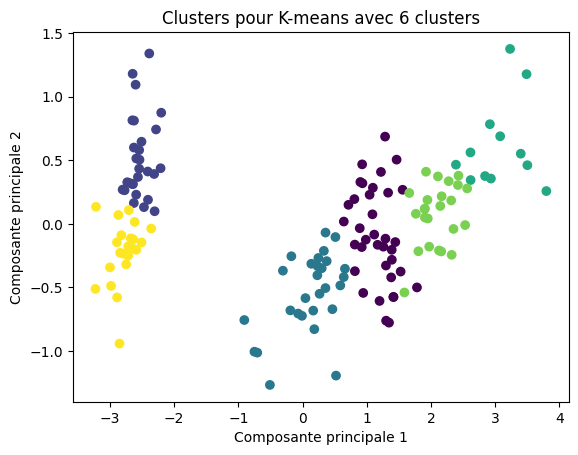

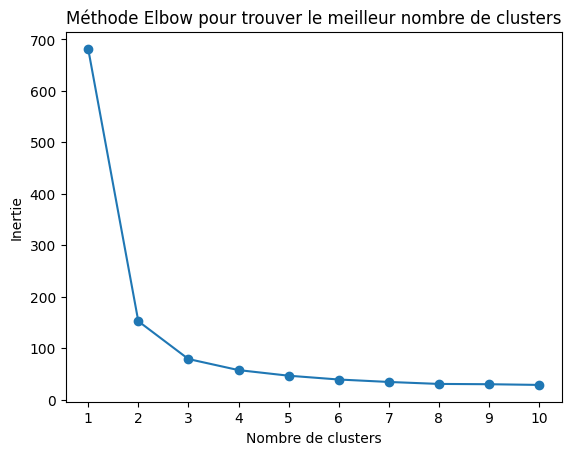

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()
X = iris.data

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title("Données iris avant clustering")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.show()

n_clusters_list = [3, 4, 5, 6]

for n_clusters in n_clusters_list:
    # Apprentissage du modèle K-means
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)

    plt.figure()
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
    plt.title(f"Clusters pour K-means avec {n_clusters} clusters")
    plt.xlabel("Composante principale 1")
    plt.ylabel("Composante principale 2")
    plt.show()

inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1, 11), inertia, marker='o')
plt.title("Méthode Elbow pour trouver le meilleur nombre de clusters")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.xticks(range(1, 11))
plt.show()